In [1]:
import pandas as pd
import altair as alt

ModuleNotFoundError: No module named 'altair'

## This is a copy of the original script that is a sanity check and should look for any suspicious patterns in the database regarding the cases where the group is categorised as "Unknown"

We load the database (clean just stands for csv rather than xls) and then filter the database. We only include all attacks that

### a) meet the three key criterias that define terrorism:  
 
 Criterion 1: The act must be aimed at attaining a political, economic, religious, or social goal.  
 Criterion 2: There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.  
 Criterion 3: The action must be outside the context of legitimate warfare activities.  
 
### b) have at least one person killed  
### c) there is no doubt that it was terror  
### d) and the attackers are not unknown

In [2]:
GDT=pd.read_csv("../RawData/GDT_clean_database_2.csv")
print(len(GDT))
GDTclean=GDT[(GDT["crit1"]&GDT["crit2"]&GDT["crit3"]==1)]
GDTclean=GDTclean[GDTclean["nkill"]!=0]
GDTclean=GDTclean[GDTclean["doubtterr"]!=1]
GDTclean["incidentno"]=1
print(len(GDT))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


181691
181691


We filter for all cases in which the attacker was unknown

In [31]:
#we create a dataframe with all cases in which the perpetrator was unknown
GDTclean_unknown=GDTclean[GDTclean["gname"]=="Unknown"]
GDTclean_unknown=GDTclean_unknown[["iyear","incidentno"]]
GDTclean_unknown=GDTclean_unknown.groupby("iyear").sum()
GDTclean_unknown=GDTclean_unknown.reset_index()

,iyear,incidentno
0,1970,35
1,1971,35
2,1972,31
3,1973,31
4,1974,37
5,1975,65
6,1976,73
7,1977,123
8,1978,118
9,1979,278


In [5]:
#and we create a dataframe with all cases in which the perpetrator was known

GDTclean_known=GDTclean[GDTclean["gname"]!="Unknown"]
GDTclean_known=GDTclean_known[["iyear","incidentno"]]
GDTclean_known=GDTclean_known.groupby("iyear").sum()
GDTclean_known=GDTclean_known.reset_index()
GDTclean_known

,iyear,incidentno
0,1970,61
1,1971,83
2,1972,201
3,1973,181
4,1974,208
5,1975,305
6,1976,295
7,1977,201
8,1978,326
9,1979,788


Now merging the two dfs into one and calculating the ratio of cases labeled as group unknown

In [50]:
Merged=pd.merge(GDTclean_known,GDTclean_unknown, on="iyear", how="outer",  suffixes=('_known', '_unknown'))
Merged["quota"]=Merged["incidentno_unknown"]/(Merged["incidentno_known"]+Merged["incidentno_unknown"])
Merged["iyear"]=pd.to_datetime(Merged["iyear"], format='%Y')
Merged

,iyear,incidentno_known,incidentno_unknown,quota
0,1970,61,35,0.364583
1,1971,83,35,0.296610
2,1972,201,31,0.133621
3,1973,181,31,0.146226
4,1974,208,37,0.151020
5,1975,305,65,0.175676
6,1976,295,73,0.198370
7,1977,201,123,0.379630
8,1978,326,118,0.265766
9,1979,788,278,0.260788


Making sure that years are rendered as a date

Now plotting the curve for the ratio of unknown cases over time

Chart({
  mark: 'line',
  data:         iyear     quota
  0  1970-01-01  0.364583
  1  1971-01-01  0.296610
  2  1972-01-01  0.133621
  3  1973-01-01  0.146226
  4  1974-01-01  0.151020
  5  1975-01-01  0.175676
  6  1976-01-01  0.198370
  7  1977-01-01  0.379630
  8  1978-01-01  0.265766
  9  1979-01-01  0.260788
  10 1980-01-01  0.461659
  11 1981-01-01  0.480427
  12 1982-01-01  0.404839
  13 1983-01-01  0.253509
  14 1984-01-01  0.249622
  15 1985-01-01  0.192719
  16 1986-01-01  0.264881
  17 1987-01-01  0.190157
  18 1988-01-01  0.285488
  19 1989-01-01  0.260568
  20 1990-01-01  0.278088
  21 1991-01-01  0.325409
  22 1992-01-01  0.337441
  23 1994-01-01  0.440367
  24 1995-01-01  0.499546
  25 1996-01-01  0.532570
  26 1997-01-01  0.635611
  27 1998-01-01  0.463768
  28 1999-01-01  0.382653
  29 2000-01-01  0.288820
  30 2001-01-01  0.348485
  31 2002-01-01  0.276873
  32 2003-01-01  0.329650
  33 2004-01-01  0.519293
  34 2005-01-01  0.525304
  35 2006-01-01  0.681568
  36 200

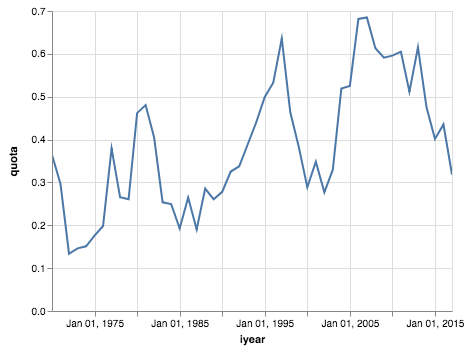

In [54]:
alt.renderers.enable('notebook')

df=Merged[["iyear","quota"]]
alt.Chart(df).mark_line().encode(
    x='iyear:T',
    y='quota'
).interactive()

so we see that the ratio went up and down pretty heavily. However there is no clear trend over time

In [7]:
#we first create one big empty dataframe, in which we will add our data
wholedf=pd.DataFrame()
wholedf

grouplist=["Unknown"]
groupclass="Unknown"

groupGTD=GDTclean[(GDTclean["gname"].isin(grouplist))]
groupfilterclass=groupclass



#after this filtering, we sum up all the incidents, we calculate the number of kills, wounds and suicides per incident
incidents=groupGTD["incidentno"].sum()
groupdeaths=groupGTD["nkill"].sum()/groupGTD["incidentno"].sum()
groupdwounds=groupGTD["nwound"].sum()/groupGTD["incidentno"].sum()
suiciderate=(groupGTD["suicide"].sum()/groupGTD["incidentno"].sum())
#we create a dataframe that is a wide-table
listdf=[("groups",[grouplist]),("groupno",[1]),("incidents",[incidents]),("deaths_per_attack",[groupdeaths]),("wound_per_attack",[groupdwounds]),("suiciderate",[suiciderate])]
#transpose it
groupstats=pd.DataFrame.from_items(listdf).transpose()
#and rename the column to the name of the class
groupstats=groupstats.rename(columns={0:groupfilterclass})
#now we check for the frequency of mentions of countries
dictionary={}
#we count the frequencies of certain words being listed
test=groupGTD['country_txt'].value_counts()
type(test)
#then we go through this dataframe, use it to fill a dictionary
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
#from which we fill a dataframe, then sort the dataframe and take the first five countries
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)
df=df[:10]
#then we rename the column by the class_name
df=df.rename(columns={0:groupfilterclass})
#and add this dataframe under the one we calculated already
groupstats=pd.concat([groupstats,df])

#this, we do now as well for other categories such as weapons, weaponsubtypes, targets, targetsubtypes
dictionary={}
test=groupGTD['weaptype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['weaptype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['weaptype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['weapsubtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['weapsubtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['weapsubtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['targtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['targtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['targtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])

#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['targsubtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['targsubtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['targsubtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
groupstats=groupstats.reset_index()
groupstats=groupstats.rename(columns={"index":(groupclass)+"_categories"})
#and then write this to a class specific csv
groupstats

,Unknown_categories,Unknown
0,groups,[Unknown]
1,groupno,1
2,incidents,32916
3,deaths_per_attack,2.834
4,wound_per_attack,4.38383
5,suiciderate,0.0553834
6,Iraq,10771
7,Pakistan,4106
8,Afghanistan,2437
9,India,1420


The next block separates the group that fits in or not

In [63]:
#we first create one big empty dataframe, in which we will add our data
wholedf=pd.DataFrame()
wholedf

grouplist=["Unknown"]
groupclass="Unknown"

groupGTD=GDTclean[(~GDTclean["gname"].isin(grouplist))]
groupfilterclass="non-"+groupclass



#after this filtering, we sum up all the incidents, we calculate the number of kills, wounds and suicides per incident
incidents=groupGTD["incidentno"].sum()
groupdeaths=groupGTD["nkill"].sum()/groupGTD["incidentno"].sum()
groupdwounds=groupGTD["nwound"].sum()/groupGTD["incidentno"].sum()
suiciderate=(groupGTD["suicide"].sum()/groupGTD["incidentno"].sum())
#we create a dataframe that is a wide-table
listdf=[("groups",[grouplist]),("groupno",[1]),("incidents",[incidents]),("deaths_per_attack",[groupdeaths]),("wound_per_attack",[groupdwounds]),("suiciderate",[suiciderate])]
#transpose it
groupstats=pd.DataFrame.from_items(listdf).transpose()
#and rename the column to the name of the class
groupstats=groupstats.rename(columns={0:groupfilterclass})
#now we check for the frequency of mentions of countries
dictionary={}
#we count the frequencies of certain words being listed
test=groupGTD['country_txt'].value_counts()
type(test)
#then we go through this dataframe, use it to fill a dictionary
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
#from which we fill a dataframe, then sort the dataframe and take the first five countries
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)
df=df[:10]
#then we rename the column by the class_name
df=df.rename(columns={0:groupfilterclass})
#and add this dataframe under the one we calculated already
groupstats=pd.concat([groupstats,df])

#this, we do now as well for other categories such as weapons, weaponsubtypes, targets, targetsubtypes
dictionary={}
test=groupGTD['weaptype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['weaptype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['weaptype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['weapsubtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['weapsubtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['weapsubtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['targtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['targtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['targtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])

#GDTclean.groupby('').count()
dictionary={}
test=groupGTD['targsubtype1_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])

test=groupGTD['targsubtype2_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])


test=groupGTD['targsubtype3_txt'].value_counts()
type(test)
for key in test.index:

    if key in dictionary:
        dictionary[key] += (test[key])
    else:
        dictionary[key] = (test[key])
df=pd.DataFrame(dictionary , index=[0]).transpose()
df=df.sort_values(by=0, ascending=False)

df=df[:5]
df=df.rename(columns={0:groupfilterclass})
groupstats=pd.concat([groupstats,df])
groupstats=groupstats.reset_index()
groupstats=groupstats.rename(columns={"index":(groupclass)+"_categories"})
#and then write this to a class specific csv
groupstats

,Unknown_categories,non-Unknown
0,groups,[Unknown]
1,groupno,1
2,incidents,41370
3,deaths_per_attack,5.22088
4,wound_per_attack,5.67225
5,suiciderate,0.0778584
6,Afghanistan,5117
7,Iraq,3654
8,India,3458
9,Colombia,2321
